#Rede neural - Predição de dígitos

Primeiramente, sobre os recursos utilizados neste notebook:<br><br>
####MNIST dataset 
O MNIST dataset consiste em uma base de imagens de números escritos à mão, sendo eles digitos de 0 a 9, com dimensões de 28x28 pixels. As imagens também são distribuidas em escalas de cor cinza, em que 0 é branco e 255 é preto. O MNIST é um dos datasets mais utilizados para introdução à análise de imagens com redes neurais. O dataset conta com cerca de 60000 registros para treino e 10000 registros para teste. Neste dataset, as imagens foram convertidas em arrays de inteiros prontos para serem utilizados, o que facilita em projetos de machine learning.<br>
Neste projeto, a importação do dataset é feita através do repositório do Tensorflow, mas você pode optar por baixar o dataset clicando <a href="https://s3.amazonaws.com/img-datasets/mnist.pkl.gz">aqui</a>.<br>
Para saber mais sobre o MNIST, você pode acessar o site oficial clicando <a href="http://yann.lecun.com/exdb/mnist/">aqui</a>.
<br><br>
####TensorFlow
O TensorFlow é uma biblioteca de código aberto para machine learning aplicável a uma ampla variedade de tarefas. É um sistema para criação e treinamento de redes neurais para detectar e decifrar padrões e correlações, análogo à forma como humanos aprendem e raciocinam.
<br><br>
####Matplotlib 
Matplotlib é uma biblioteca de software para criação de gráficos e visualização de dados em geral, feita para e da linguagem de programação Python e sua extensão matemática NumPy.
##Problema abordado

O problema abordado neste notebook trata-se de um caso de classificação em machine learning, e no nosso contexto, o objetivo é treinar uma rede neural capaz de prever o dígito correspondente a uma dada imagem da nossa base de dados de teste.

In [45]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist  
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###1 - Carregamento dos dados

Para o carregamento e manipulação do dataset, foi utilizada a lib NumPy, uma biblioteca para manipulação de arrays multidimensionais compostos de elementos do mesmo tipo.<br><br>
O carregamento dos dados foi dividido em dados de treino e dados de teste.<br>
Conteúdo dos arrays após o carregamento:<br>
- x_train contém 60.000 arrays com dimensões de 28x28, e y_train contém suas labels correspondentes.<br>
- x_test contém 10.000 arrays com dimensões de 28x28, e y_test contém suas labels correspondentes.<br>


In [36]:
import pickle
import numpy as np

print(type(x_train), x_train.size, x_train.shape)
print(type(y_train), y_train.size, y_train.shape)
print(type(x_test), x_test.size, x_test.shape)
print(type(y_test), y_test.size, y_test.shape)

# Conteúdo das labels
print(y_train[55], y_test[583])

<class 'numpy.ndarray'> 47040000 (60000, 28, 28)
<class 'numpy.ndarray'> 60000 (60000,)
<class 'numpy.ndarray'> 7840000 (10000, 28, 28)
<class 'numpy.ndarray'> 10000 (10000,)
8 2


###2 - Utilizando Matplotlib para visualização do conteúdo
Para visualização das imagens do dataset, foi utilizada a matplotlib, capaz de exibir o conteúdo do nosso array de treinamento.<br>
Para embelezar a exibição do dado, o colormap da imagem exibida foi definido como "magma_r", um dos colormaps disponíveis para a matplotlib. Para mais opções de cores e informações sobre a lib, clique <a href="https://matplotlib.org/tutorials/colors/colormaps.html">aqui</a>.

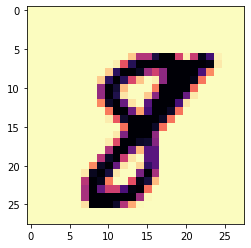

In [37]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.imshow(x_train[55].reshape(28, 28), cmap=cm.magma_r)

Neste trecho, utilizamos a matplotlib para exibir algumas das imagens de exemplo da nossa base de dados. 

<function matplotlib.pyplot.show>

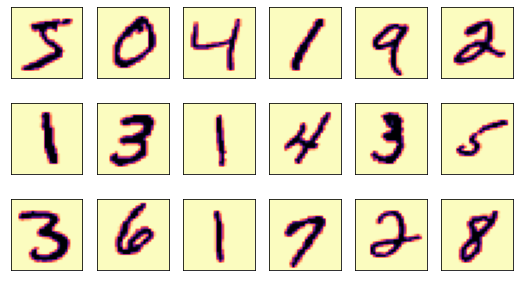

In [38]:
images = x_train[0:18]
fig, axes = plt.subplots(3, 6, figsize=[9,5])

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].reshape(28, 28), cmap=cm.magma_r)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show

###4 - Distribuição dos dados de treinamento
O gráfico abaixo ilustra a distribuição dos dados de treinamento, que estão divididos uniformemente entre os dígitos de 0 a 9.<br>
Abaixo do gráfico também é possível observar a contagem unitária correspondente a cada dígito, respectivamente. 


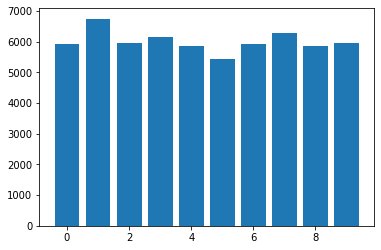

Número de registros: [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [39]:
counts = np.bincount(y_train)
nums = np.arange(len(counts))
plt.bar(nums, counts)
plt.show()
print("Número de registros:", counts)

###5 - Aplicando o modelo de rede neural
Para a criação do modelo de rede neural, foi utilizado o Keras, uma API de deep learning disponibilizada pela biblioteca do Tensorflow. O Tensorflow foi utilizado para treinar o modelo com 60.000 registros, compilar o modelo, e em seguida classificar os 10.000 dados de teste com uma acurácia de cerca de 98%.<br><br>
####**Criando o modelo**
Para criação do modelo com o Keras, empilhamos camadas na rede neural que serão responsáveis pela a classificação dos dados. Nosso modelo contém 4 camadas:
- <a href="https://keras.io/api/layers/reshaping_layers/flatten/">Flatten</a>: responsável por remodelar os dados em uma matriz unidimensional
- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense">Dense</a>: responsável por definir e alimentar os neurônios da rede neural com o array de saída da etapa anterior, e através da <a href="https://keras.io/activations/">função de ativação (activation function)</a>, propagar o resultado do processamento para as próximas camadas
- <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout">Dropout</a>: responsável por, randomicamente, ignorar um conjunto de neurônios da rede neural. Normalmente é utilizado para evitar overfitting na rede neural.
* A última camada Dense é responsável por condensar a saída em probabilidades para cada um dos 10 dígitos (0 a 9).
<br>

####**Compilando o modelo**
* <a href="https://keras.io/api/optimizers/">Adam</a> é um dos algoritmos de otimização disponíveis para o Keras que utiliza o método iterativo "<a href="https://towardsdatascience.com/stochastic-gradient-descent-clearly-explained-53d239905d31">stochastic gradient descent</a>" para ajustar os pesos da rede neural.
* "Sparse categorical crossentropy" é uma <a href="https://keras.io/losses/">função de perda (loss function)</a> requerida para compilar o modelo. Ela é responsável por medir a precisão do modelo durante o treino. A minimização da função de perda indica que o modelo está seguindo na direção correta.
* "metrics" é a função que define o parâmetro de julgamento da performance do nosso modelo. No nosso caso, utilizamos a acurácia das predições comparadas aos registros y_test como métrica de avaliação.


In [40]:
import tensorflow as tf

# Padronização dos dados em uma escala de 0 a 1 para otimizar o processamento
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# "epochs" define o número de ciclos da rede neural.
# Maiores ciclos resultam em uma maior acurácia, 
# mas levam mais tempo para concluir o treinamento 
model.fit(x_train, y_train, epochs=8)
model.evaluate(x_test, y_test)

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2575 - accuracy: 0.9243
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1178 - accuracy: 0.9655
Epoch 3/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0871 - accuracy: 0.9734
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0718 - accuracy: 0.9771
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9803
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0501 - accuracy: 0.9835
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0448 - accuracy: 0.9854
Epoch 8/8
313/313 [==============================] - 1s 2ms/step - loss: 0.0641 - accuracy: 0.9812


[0.0640760064125061, 0.9811999797821045]

Como observado acima, os valores *loss* e *accuracy* indicam, respectivamente, os percentuais de perda e a precisão do nosso modelo.<br>
O resultado ```[0.0640760064125061, 0.9811999797821045]``` indica as médias para os valores de *loss* e *accuracy* mencionados anteriormente.<br>
Com isso, nosso modelo após treinamento apresentou uma acurácia de aproximadamente 98%, que será aplicada para predizer os dígitos a partir da nossa base de teste.
<br><br>
###6 - Gerando predições a partir do dataset de teste
Com nosso modelo criado, agora é possível predizer os dígitos a partir da nossa base de testes. O formato das predições está organizado em uma lista que contém os valores de probabilidade para cada dígito de 0 a 9, respectivamente.

Probabilidades:  [2.3042755e-12 7.6925687e-08 1.0662804e-05 9.9996793e-01 9.1387102e-07
 1.9860609e-05 1.7490736e-11 6.5554786e-07 1.1810484e-09 2.5363744e-10]
Predição:  3
Imagem analizada: AxesImage(54,36;334.8x217.44)


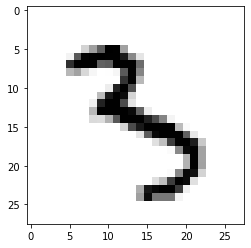

In [44]:
# Neste trecho utilizamos o modelo criado previamente para predizer a partir da nossa base de teste
predictions = model.predict(x_test)
print("Probabilidades: ", predictions[569])
print("Predição: ", np.argmax(predictions[569]))
print("Imagem analizada:", plt.imshow(x_test[569].reshape(28, 28), cmap=cm.Greys))